In [1]:
# Load Libraries

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

In [54]:
# import sys
# import os
# scripts_path = os.path.abspath("../scripts")
# if scripts_path not in sys.path:
#     sys.path.append(scripts_path)

# from wrangle import wrangle
# df = wrangle("../data/air_quality_in_nairobi.csv")

# Load combined dataset

# file directory
file= "../data/Air_Quality_Lagos_Combined.csv"

# load into DataFrame
df = pd.read_csv(file, index_col="date", parse_dates=True)

# resampling the data to 1 hour interval
y = df["PM2.5"].resample('6h').mean().interpolate(method = "time")

y.head()

date
2023-11-01 12:00:00+01:00    19.000000
2023-11-01 18:00:00+01:00    15.610000
2023-11-02 00:00:00+01:00    19.867137
2023-11-02 06:00:00+01:00    24.124275
2023-11-02 12:00:00+01:00    28.381412
Freq: 6h, Name: PM2.5, dtype: float64

In [55]:
# Size of the Dataset
shape = y.shape

print(f"The Shape of the Dataset is: {shape}")
print(f"The Dataset has: {shape[0]} historical data")
print(f"The number of missing data is: {y.isna().sum()}")
# print(f"The dataset have {shape[1]} column. For PM2.5 Readings")

The Shape of the Dataset is: (2068,)
The Dataset has: 2068 historical data
The number of missing data is: 0


In [56]:
# Data Split 
cutt_off = int(len(y) * 0.8)

train = y.iloc[:cutt_off]
test = y.iloc[cutt_off:]


# # train split
# train = y.loc[:"2024-11-24"]

# # test split
# test = y.loc["2024-11-25":]

print(f"Train split: {train.shape}")
print(f"Test split: {test.shape}")

Train split: (1654,)
Test split: (414,)


# Correct HyperParameter

In [57]:
model = auto_arima(
    train,
    seasonal=True,
    m=28,  # season length (e.g., 4 for 6-hourly data = 1 day)
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=12620.394, Time=0.07 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=12549.002, Time=0.37 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=12552.079, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=12618.400, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=12588.976, Time=0.11 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=12443.316, Time=0.83 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(2,0,1)[4] intercept   : AIC=12239.443, Time=1.24 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=12263.217, Time=0.97 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(2,0,2)[4] intercept   : AIC=12241.368, Time=1.36 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,0,2)[4] intercept   : AIC=12239.240, Time=1.66 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,2)[4] intercept   : AIC=12502.594, Time=0.74 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=12563.100, Time=0.40 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(1,0,2)[4] intercept   : AIC=12247.789, Time=1.47 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(1,0,2)[4] intercept   : AIC=12220.178, Time=1.68 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,2)[4] intercept   : AIC=12477.268, Time=0.81 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(1,0,1)[4] intercept   : AIC=12249.847, Time=1.45 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(2,0,2)[4] intercept   : AIC=12224.662, Time=2.86 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,1)[4] intercept   : AIC=12533.266, Time=0.48 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(2,0,1)[4] intercept   : AIC=12220.583, Time=1.96 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(1,0,2)[4] intercept   : AIC=12181.879, Time=1.84 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(0,0,2)[4] intercept   : AIC=12407.170, Time=0.97 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(1,0,1)[4] intercept   : AIC=12221.507, Time=1.65 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(2,0,2)[4] intercept   : AIC=12183.771, Time=3.29 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(0,0,1)[4] intercept   : AIC=12454.992, Time=0.98 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(2,0,1)[4] intercept   : AIC=12182.172, Time=2.66 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(1,0,2)[4] intercept   : AIC=12173.509, Time=5.46 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,2)[4] intercept   : AIC=12350.366, Time=3.13 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(1,0,1)[4] intercept   : AIC=12112.103, Time=3.98 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,1)[4] intercept   : AIC=12364.059, Time=2.91 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(1,0,0)[4] intercept   : AIC=12354.950, Time=2.75 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(2,0,1)[4] intercept   : AIC=12177.600, Time=2.99 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,0)[4] intercept   : AIC=12374.095, Time=1.22 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(2,0,0)[4] intercept   : AIC=12235.349, Time=2.77 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(2,0,2)[4] intercept   : AIC=12097.361, Time=5.04 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(2,0,2)[4] intercept   : AIC=inf, Time=5.03 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(2,0,2)[4] intercept   : AIC=inf, Time=5.74 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(2,0,2)[4] intercept   : AIC=inf, Time=4.74 sec


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(2,0,2)[4]             : AIC=inf, Time=3.28 sec

Best model:  ARIMA(3,1,1)(2,0,2)[4] intercept
Total fit time: 82.911 seconds


# AR (AutoRegressive) Model

In [ ]:
# Fit the AR model
ar_model = AutoReg(train, lags=29)  # for 24hours or 1 day
ar_result = ar_model.fit()

In [ ]:
# Model summary
ar_result.summary()

In [ ]:
# Forecast
y_ar_pred = ar_result.predict(test.index.min(), test.index.max())
y_ar_pred.head()


In [ ]:
# Baseline Model Metrics
mean = train.mean()
y_mean_pred = len(train) * [mean]

# MSE and MAE of the Baseline model
mse_baseline = mean_squared_error(train, y_mean_pred)
mae_baseline = mean_absolute_error(train, y_mean_pred)


print(f"MSE of the baseline model: {round(mse_baseline, 2)}")
print(f"MAE of the baseline model: {round(mae_baseline, 2)}")

In [ ]:
# Evaluation
mse = mean_squared_error(test, y_ar_pred)
mae = mean_absolute_error(test, y_ar_pred)

print(f"AR Model - MSE: {mse:.2f}")
print(f"AR Model - MAE: {mae:.2f}")

In [ ]:
# Residual graph
fig, ax = plt.subplots(figsize = (15, 5))
ar_result.resid.plot(ax = ax)
plt.title("Residual Plot")
plt.xlabel("Date")
plt.show()

In [ ]:
# Residual Histogram
ar_result.resid.plot(
    kind = "hist", 
    xlabel = "Residual",
    ylabel = "frequency",
    title = "Residual Distribution"
)

In [ ]:
# DataFrame for Actual Test data and Predictions

df_pred_test = pd.DataFrame({
            'y_test':test,
            'y_pred':y_ar_pred
}, index = test.index)
df_pred_test.tail()

In [ ]:
# Plot results
fig = px.line(
    data_frame= df_pred_test,
    title = "Prediction vs Actual Test data ",
    labels= {"value" : "PM2.5"}
)
fig.show()

In [ ]:
# Walk Forward Validation

y_pred_wfv = pd.Series()
history = train.copy()
for i in range(len(test)):
    model = AutoReg(history, lags=29).fit()
    next_pred = model.forecast()
    y_pred_wfv = pd.concat([y_pred_wfv, next_pred])
    history = pd.concat([history, test[next_pred.index]]) 


In [ ]:
df_pred_wfv = pd.DataFrame({
            'y_test':test,
            'y_pred':y_pred_wfv
}, index = test.index)
df_pred_wfv.tail()

In [ ]:
fig = px.line(
    data_frame= df_pred_wfv,
    title = "Walk forward Validation Prediction and Actual Test data",
    labels= {"value" : "PM2.5"}
)

fig.show()

In [ ]:
# Evaluation of the Walk forward Validation Prediction

mse = mean_squared_error(test, y_pred_wfv)
mae = mean_absolute_error(test, y_pred_wfv)

print(f"AR Model - MSE: {mse:.2f}")
print(f"AR Model - MAE: {mae:.2f}")

## Summary

The AR model Underperformed. why:
- The forecast (red line) is almost flat, failing to capture the volatility, spikes, and seasonality in the test set.
- AR models rely only on past values of the series (lags) and assume a linear relationship, which often fails when: There’s strong seasonality or nonlinearity.
- Residuals are not white noise, as we saw earlier from decomposition and ACF plots.



# ARMA (AutoRegressive Moving Average) Model

In [28]:
# Fit ARMA(p=2, q=2) on differenced data (you can tune p and q later)
arma_model = ARIMA(train, order=(2, 0, 0))  # d=0 because we assume stationary (you can test d=1 if needed)
arma_result = arma_model.fit()

In [7]:
arma_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1654
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -6181.053
Date:                Thu, 05 Jun 2025   AIC                          12372.107
Time:                        21:01:16   BIC                          12399.159
Sample:                    11-01-2023   HQIC                         12382.136
                         - 12-18-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0434      0.018    -59.512      0.000      -1.078      -1.009
ar.L2         -0.3263      0.022    -14.929      0.000      -0.369      -0.283
ar.L3         -0.2755      0.017    -16.208      0.000      -0.309      -0.242
ma.L1          0.9537      0.008    121.081      0.000       0.938       0.969
sigma2       103.5546      1.508     68.654      0.000     100.598     106.511
===================================================================================
Ljung-Box (L1) (Q):                   1.74   Jarque-Bera (JB):              9984.98
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Forecast
y_arma_pred = arma_result.predict(test.index.min(), test.index.max())
y_arma_pred.head()

2024-12-19 06:00:00+01:00    1.323340
2024-12-19 12:00:00+01:00    0.545830
2024-12-19 18:00:00+01:00    0.164361
2024-12-20 00:00:00+01:00    0.041101
2024-12-20 06:00:00+01:00    0.030297
Freq: 6h, Name: predicted_mean, dtype: float64

In [ ]:
# Baseline Model Metrics
mean = train.mean()
y_mean_pred = len(train) * [mean]

# MSE and MAE of the Baseline model
mse_baseline = mean_squared_error(train, y_mean_pred)
mae_baseline = mean_absolute_error(train, y_mean_pred)


print(f"MSE of the baseline model: {round(mse_baseline, 2)}")
print(f"MAE of the baseline model: {round(mae_baseline, 2)}")

In [32]:
# Evaluation
mse = mean_squared_error(test, y_arma_pred)
mae = mean_absolute_error(test, y_arma_pred)

print(f"ARMA Model - MSE: {mse:.2f}")
print(f"ARMA Model - MAE: {mae:.2f}")

ARMA Model - MSE: 93.33
ARMA Model - MAE: 5.51


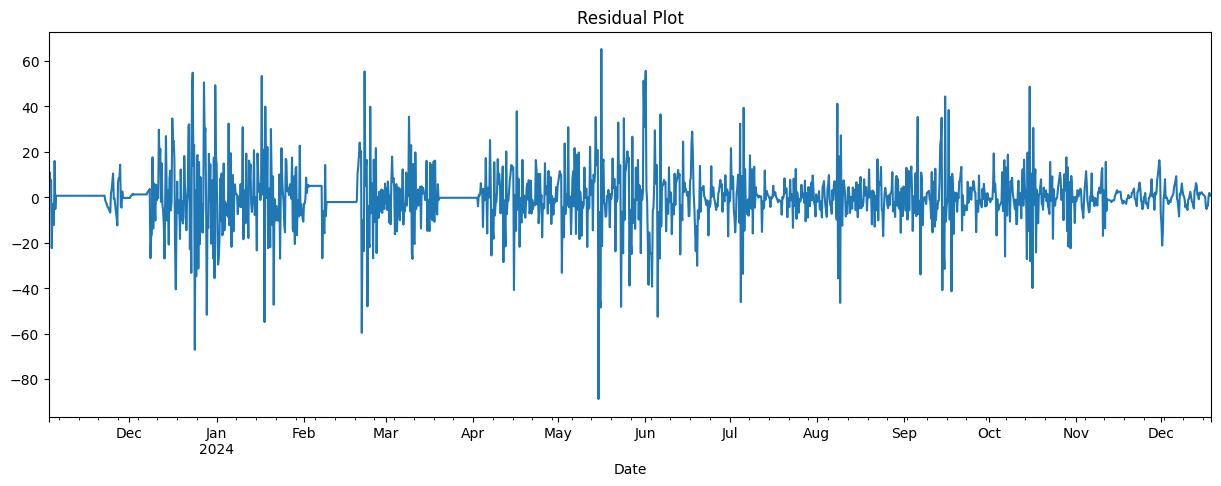

In [33]:
# Residual graph
fig, ax = plt.subplots(figsize = (15, 5))
arma_result.resid.plot(ax = ax)
plt.title("Residual Plot")
plt.xlabel("Date")
plt.show()

<Axes: title={'center': 'Residual Distribution'}, xlabel='Residual', ylabel='frequency'>

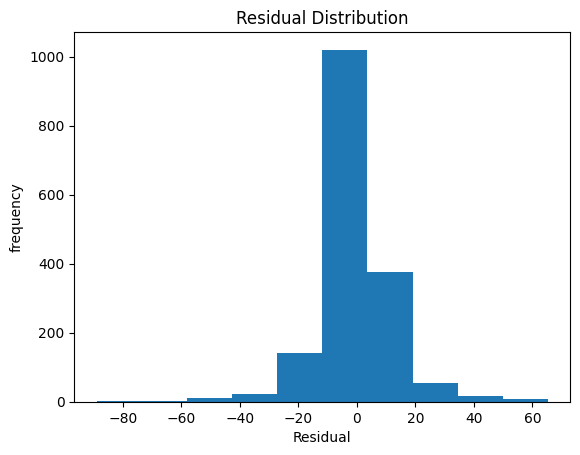

In [34]:
# Residual Histogram
arma_result.resid.plot(
    kind = "hist", 
    xlabel = "Residual",
    ylabel = "frequency",
    title = "Residual Distribution"
)

In [35]:
# DataFrame for Actual Test data and Predictions

df_pred_test = pd.DataFrame({
            'y_test':test,
            'y_pred':y_arma_pred
}, index = test.index)
df_pred_test.tail()

,y_test,y_pred
date,,
2025-03-31 06:00:00+01:00,-0.544196,0.078502
2025-03-31 12:00:00+01:00,-0.544196,0.078502
2025-03-31 18:00:00+01:00,-0.544196,0.078502
2025-04-01 00:00:00+01:00,-0.544196,0.078502
2025-04-01 06:00:00+01:00,-0.544196,0.078502


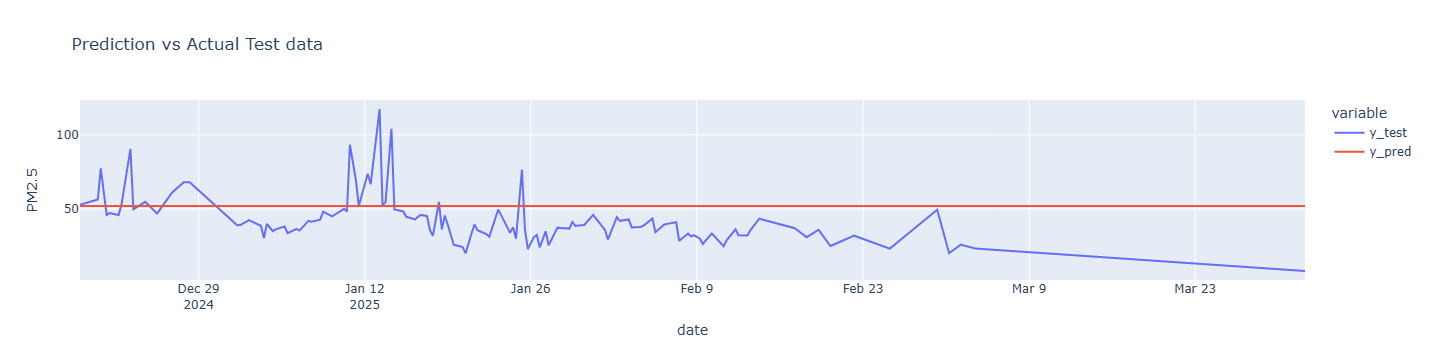

In [14]:
# Plot results
fig = px.line(
    data_frame= df_pred_test,
    title = "Prediction vs Actual Test data ",
    labels= {"value" : "PM2.5"}
)
fig.show()

In [ ]:
# Walk Forward Validation

y_pred_wfv = pd.Series()
history = train.copy()
for i in range(len(test)):
     model = ARIMA(history, order = (3, 1, 1)).fit()
     next_pred = model.forecast()
     y_pred_wfv = pd.concat([y_pred_wfv, next_pred])
     history = pd.concat([history, test[next_pred.index]])


In [ ]:
df_pred_wfv = pd.DataFrame({
            'y_test':test,
            'y_pred':y_pred_wfv
}, index = test.index)
df_pred_wfv.tail()

In [ ]:
fig = px.line(
    data_frame= df_pred_wfv,
    title = "Walk forward Validation Prediction and Actual Test data",
    labels= {"value" : "PM2.5"}
)

fig.show()

In [ ]:
# Evaluation of the Walk forward Validation Prediction

mse = mean_squared_error(test, y_pred_wfv)
mae = mean_absolute_error(test, y_pred_wfv)

print(f"AR Model - MSE: {mse:.2f}")
print(f"AR Model - MAE: {mae:.2f}")

# ARIMA MODEL

In [58]:
# Fit ARIMA
arima_model = ARIMA(train, order=(2, 1, 3))  # d=1 for first-order differencing
arima_result = arima_model.fit()

In [59]:
# Forecast
y_pred_test = arima_result.predict(test.index.min(), test.index.max())
y_pred_test



2024-12-19 00:00:00+01:00    52.073969
2024-12-19 06:00:00+01:00    51.655250
2024-12-19 12:00:00+01:00    51.860913
2024-12-19 18:00:00+01:00    52.273932
2024-12-20 00:00:00+01:00    52.068929
                               ...    
2025-03-31 06:00:00+01:00    51.939671
2025-03-31 12:00:00+01:00    51.981449
2025-03-31 18:00:00+01:00    51.992300
2025-04-01 00:00:00+01:00    51.950960
2025-04-01 06:00:00+01:00    51.940407
Freq: 6h, Name: predicted_mean, Length: 414, dtype: float64

In [60]:
# Evaluation
mse = mean_squared_error(test, y_pred_test)
mae = mean_absolute_error(test, y_pred_test)

print(f"ARIMA Model - MSE: {mse:.2f}")
print(f"ARIMA Model - MAE: {mae:.2f}")


ARIMA Model - MSE: 582.50
ARIMA Model - MAE: 20.68


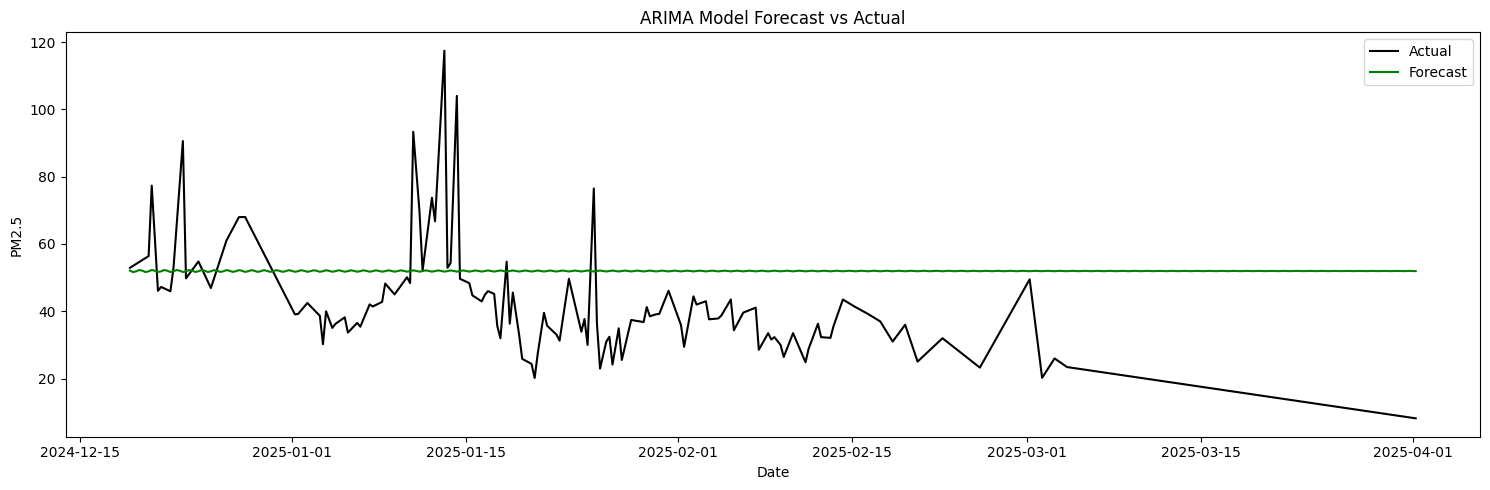

In [61]:
# Plot
plt.figure(figsize=(15, 5))
plt.plot(test, label="Actual", color='black')
plt.plot(y_pred_test, label="Forecast", color='green')
plt.title("ARIMA Model Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.legend()
plt.tight_layout()
plt.show()

# SARIMA (Seasonal ARIMA) Model

In [115]:
# Fit SARIMA
sarima_model = SARIMAX(train,
                       order=(2, 1, 3),
                       seasonal_order=(1, 0, 1, 28),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Best model:  ARIMA(2,1,3)(1,0,1)[28]

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [116]:
# Forecast
y_sarima_pred = sarima_result.predict(test.index.min(), test.index.max())
y_sarima_pred.head(10)


2024-12-19 00:00:00+01:00    52.560571
2024-12-19 06:00:00+01:00    52.659373
2024-12-19 12:00:00+01:00    51.472220
2024-12-19 18:00:00+01:00    51.723065
2024-12-20 00:00:00+01:00    51.965053
2024-12-20 06:00:00+01:00    52.297827
2024-12-20 12:00:00+01:00    51.832053
2024-12-20 18:00:00+01:00    52.174191
2024-12-21 00:00:00+01:00    52.775478
2024-12-21 06:00:00+01:00    53.925826
Freq: 6h, Name: predicted_mean, dtype: float64

In [117]:
# Baseline Model Metrics
mean = train.mean()
y_mean_pred = len(train) * [mean]

# MSE and MAE of the Baseline model
mse_baseline = mean_squared_error(train, y_mean_pred)
mae_baseline = mean_absolute_error(train, y_mean_pred)


print(f"MSE of the baseline model: {round(mse_baseline, 2)}")
print(f"MAE of the baseline model: {round(mae_baseline, 2)}")

MSE of the baseline model: 481.99
MAE of the baseline model: 15.79


In [118]:
# Evaluation
mse = mean_squared_error(test, y_sarima_pred)
mae = mean_absolute_error(test, y_sarima_pred)

print(f"SARIMA Model - MSE: {mse:.2f}")
print(f"SARIMA Model - MAE: {mae:.2f}")

SARIMA Model - MSE: 688.67
SARIMA Model - MAE: 22.65


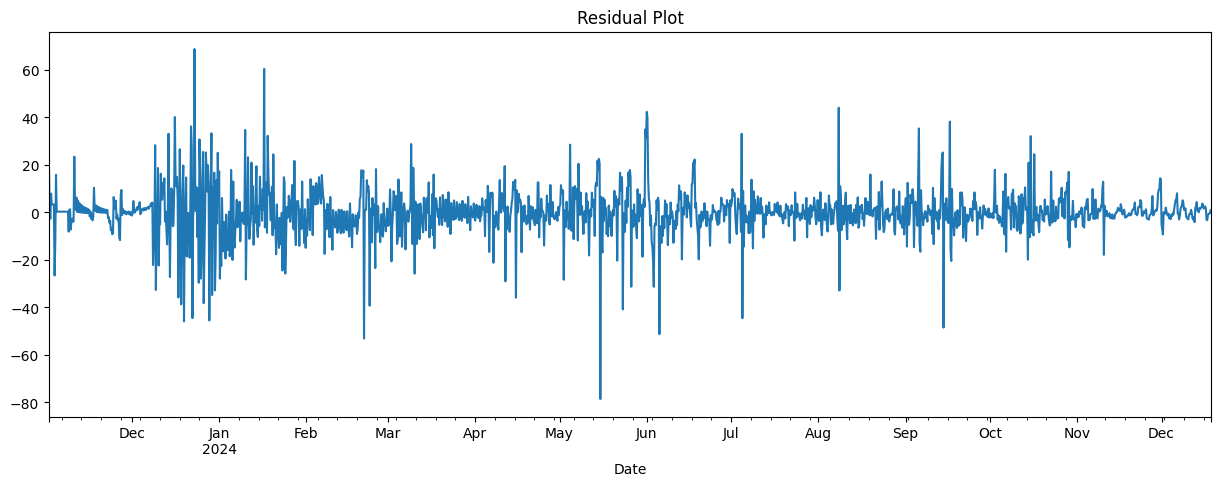

In [119]:
# Residual graph
fig, ax = plt.subplots(figsize = (15, 5))
sarima_result.resid.plot(ax = ax)
plt.title("Residual Plot")
plt.xlabel("Date")
plt.show()

<Axes: title={'center': 'Residual Distribution'}, xlabel='Residual', ylabel='frequency'>

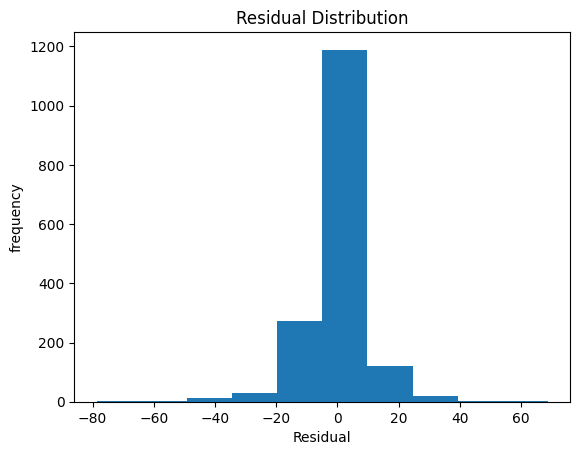

In [120]:
# Residual Histogram
sarima_result.resid.plot(
    kind = "hist", 
    xlabel = "Residual",
    ylabel = "frequency",
    title = "Residual Distribution"
)

In [122]:
# Check out necessary charts

results.plot_diagnostics(figsize=(15, 8))
plt.show()

NameError: name 'results' is not defined

In [113]:
# DataFrame for Actual Test data and Predictions

df_pred_test = pd.DataFrame({
            'y_test':test,
            'y_pred':y_sarima_pred
}, index = test.index)
df_pred_test.tail()

,y_test,y_pred
date,,
2025-03-31 06:00:00+01:00,8.744196,65.259108
2025-03-31 12:00:00+01:00,8.608147,60.920648
2025-03-31 18:00:00+01:00,8.472098,63.722024
2025-04-01 00:00:00+01:00,8.336049,63.437554
2025-04-01 06:00:00+01:00,8.200000,61.431481


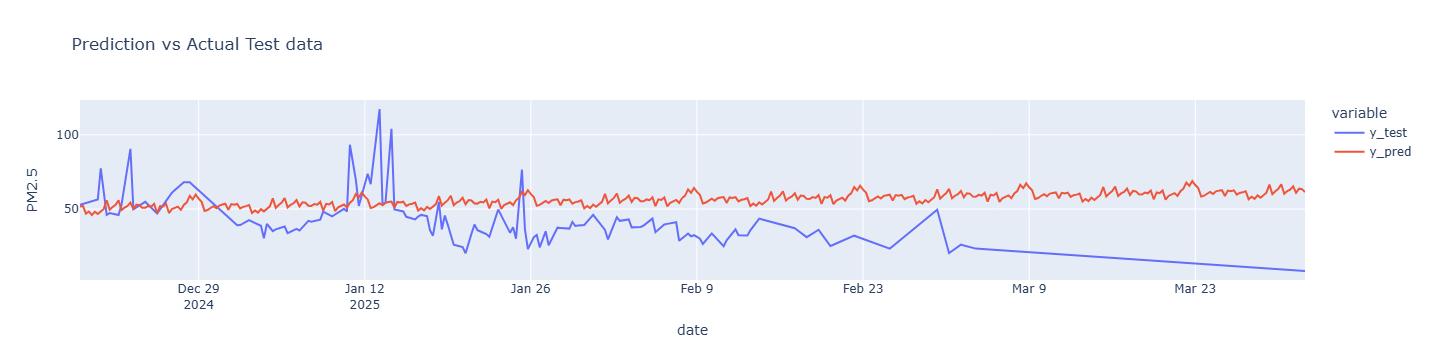

In [114]:
# Plot results
fig = px.line(
    data_frame= df_pred_test,
    title = "Prediction vs Actual Test data ",
    labels= {"value" : "PM2.5"}
)
fig.show()

In [121]:
# Walk Forward Validation

y_pred_wfv = pd.Series()
history = train.copy()
for i in range(len(test)):
     model = SARIMAX(history, order=(2, 1, 3), seasonal_order=(1, 0, 1, 28)).fit()
     next_pred = model.forecast()
     y_pred_wfv = pd.concat([y_pred_wfv, next_pred])
     history = pd.concat([history, test[next_pred.index]])


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\user\AppData\Local\Temp\ipykernel_9948\973820395.py:8: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\u

In [123]:
df_pred_wfv = pd.DataFrame({
            'y_test':test,
            'y_pred':y_pred_wfv
}, index = test.index)
df_pred_wfv.tail()

,y_test,y_pred
date,,
2025-03-31 06:00:00+01:00,8.744196,9.384490
2025-03-31 12:00:00+01:00,8.608147,7.365473
2025-03-31 18:00:00+01:00,8.472098,8.562928
2025-04-01 00:00:00+01:00,8.336049,8.824359
2025-04-01 06:00:00+01:00,8.200000,8.325173


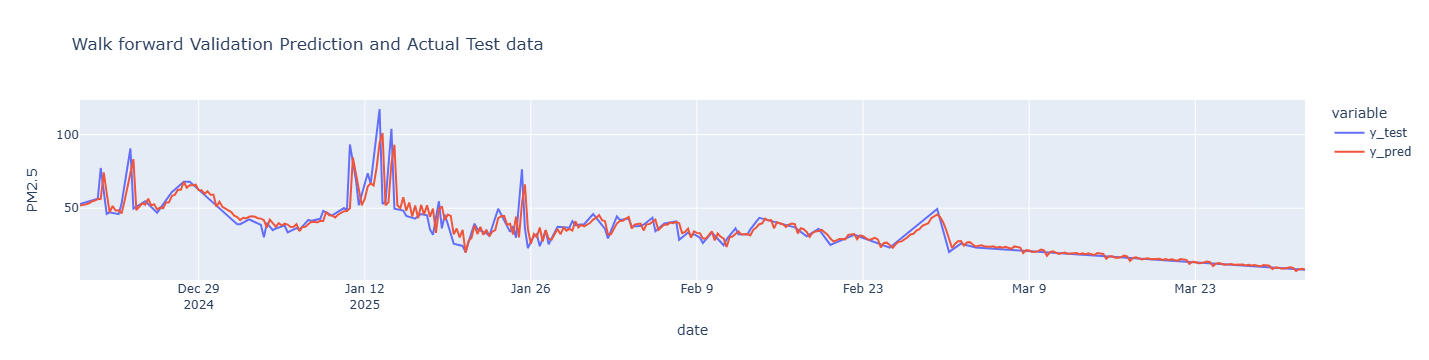

In [124]:
fig = px.line(
    data_frame= df_pred_wfv,
    title = "Walk forward Validation Prediction and Actual Test data",
    labels= {"value" : "PM2.5"}
)

fig.show()

In [125]:
# Evaluation of the Walk forward Validation Prediction

mse = mean_squared_error(test, y_pred_wfv)
mae = mean_absolute_error(test, y_pred_wfv)

print(f"AR Model - MSE: {mse:.2f}")
print(f"AR Model - MAE: {mae:.2f}")

AR Model - MSE: 43.70
AR Model - MAE: 3.35
